# NLP_GoingDeeper | 05.Transformer
---

- Sequence-to-sequence(Seq2seq)는 신경망 언어모델, 특히 **기계번역**에서 혁신적 발전을 가져왔습니다. 
- 기존의 단일 RNN은 번역에 적합한 구조가 아니었지만, 두 개의 RNN을 결합한 Encoder-Decoder 구조를 만들어 문맥 전체를 반영한 번역이 가능하게 됐습니다. 

```
Before)
Step 1: [나는] -> [I]
Step 2: [나는] [점심을] -> [I] [lunch]
Step 3: [나는] [점심을] [먹는다] -> [I] [lunch] [eat(?)]

After)
Encode(나는 점심을 먹는다)
-> 고정된 크기의 컨텍스트 벡터
-> Decode(컨텍스트 벡터) = I eat lunch!
```

- 단순 RNN은 긴 입력에 대한 정보를 학습하기 어렵기 때문에 Seq2seq에서는 LSTM을 사용한 Encoder-Decoder구조를 채택합니다.
- Encoder에 Input Sequence x를 넣으면 고정된 크기의 Representation Vector v 에 모든 정보를 담아 Decoder에게 전해주는 구조입니다. 
- Decoder는 전달받은 v를 기반으로 Output Sequence y를 생성합니다.
- 이때 v 는 컨텍스트 벡터(context vector)입니다. 
- 하지만 고정된 크기의 컨텍스트 벡터를 사용하는 것은 필연적으로 정보의 손실을 야기합니다.
- 특히 문장이 길어지면 더욱 손실이 커지게 됩니다. 
- 컨텍스트 벡터가 모든 Embedding의 평균이라 할 때, 3단어를 포함하는 문장과 100단어를 포함하는 문장 중 손실이 일어나는 것은 100단어를 포함하는 문장일 것입니다. 
- 이 때문에 Dzmitry Bahdanau는 모든 단어를 같은 비중으로 압축하는 것이 아니라, 번역하는 데 중요한 단어만 큰 비중을 줘서 성능을 높이자는 아이디어로 Attention을 제안합니다. 
- [Attn: Illustrated Attention
](https://eda-ai-lab.tistory.com/157)
- 매 스텝의 Hidden State값을 사용하는 것을 효과가 좋았습니다. 
- 실제로 그렇게 만들어진 Attention을 히트맵으로 출력하면 의미적으로 유사한 단어들끼리 연결되는 것을 확인할 수 있습니다. 
- 이때 Bahdanau Attention의 문제는 T 스텝에서 Decoder의 Hidden State을 구하기 위해 T-1 스텝의 Hidden State를 사용해야 한다는 것입니다.
- 이는 재귀적으로 동작하는 RNN에 역행하는 연산이므로 효율적이지 못했고, Luong은 이를 개선한 Attention 기법을 제안합니다. 
- [Luong Attention](https://hcnoh.github.io/2019-01-01-luong-attention)

## Attention Is All You Need
- We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely.
- RNN과 CNN을 완전히 배제하고 Attention 메커니즘에만 기반을 둔 새롭고 단순한 구조, Transformer를 제안합니다. 
- RNN의 '기울기 소실(Vanishing Gradient)'문제는 완벽히 해결되지 않았습니다. 
- 심지어 문장 데이터를 순차적으로 계산한다는 특성은 병렬 처리가 불가능하게 했습니다. 
- [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf)
- 저자들은 문장에서 연속성이라는 개념을 과감하게 배제합니다. 대신 Attention 으로 각 단어들의 상관과계를 구하는 것에 집중합니다. 
- 문장을 모델링 한다는 것은 주어진 단어를 보고 모르는 단어에 확률을 할당하는 것입니다. 
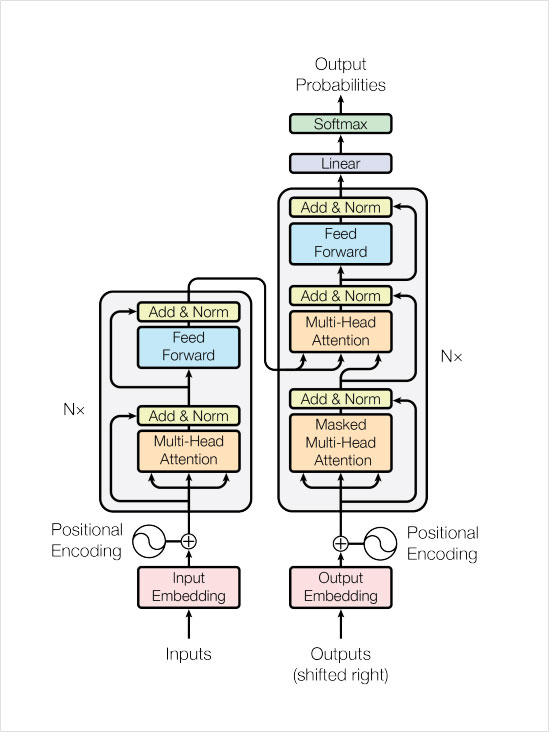

- 트랜스포머도 엄밀히는 Seq2seq에서 제안된 Encoder-Decoder 구조를 사용합니다. 
- 대신 그 안에는 LSTM 대신 다양한 모듈이 존재하는데, 이러한 Encoder와 디코더를 여러 개(논문에서는 6개) 쌓아올려 모델을 완성합니다. 
- Enc-Enc-...-Dec-Dec-..구조입니다.

## Positional Encoding
- 문장의 연속성을 배제할 수 있었던, 모델의 최하단에 위치한 positional encoding 입니다. 
- positional encoding은 문장에 연속성을 부여하는 새로운 방법을 제시합니다. 
- 쉽게 말하면 입력이 들어온 순서대로 단어에 표기를 하는 것과 같습니다. 
- [positional embedding](https://skyjwoo.tistory.com/31)

- 글의 저자가 제시한 Positional Encoding의 두 가지 방법과 그 한계는 다음과 같습니다. 
    1. 각 단어에 0~1사이의 값을 더한다. 0을 첫번째 단어로, 1을 마지막 단어로 한다.
        - 문장의 길이에 따라 더해지는 값이 가변적이기 때문에 단어 간의 거리(Delta)가 일정하지 않다.
    2. 각 단어에 선형적으로 증가하는 정수를 더한다. 
        - 단어 간의 거리(Delta)가 일정해지는 것은 좋지만 범위가 무제한이기 때문에 값이 매우 커질 수 있고 모델이 일반화하기 어려워진다. 

- positional encoding이 만족해야할 4가지 조건은 다음과 같습니다. 
    1. 각 time-step마다 고유의 encoding 값을 출력해야 한다.
    2. 서로 다른 time-step이라도 같은 거리라면 차이가 일정해야 한다.
    3. 순서를 나타내는 값이 특정 범위 내에서 일반화가 가능해야 한다.
    4. 같은 위치라면 언제든 같은 값을 출력해야 한다. 
    
- 저자들이 사용한 Positional Encoding 수식은 아래와 같습니다. 
$$PE_{pos,2i} = sin(pos/10000^{2i/d_{model}})$$
$$PE_{pos,2i+1} = cos(pos/10000^{2i/d_{model}})$$

- pos는 단어가 위치한 Time-step을 의미하며, i는 Encoding 차원의 Index, d_model은 모델의 Embedding차원 수 입니다. 
- 이를 Sinusoid(사인파)Embedding이라고 합니다. 


In [1]:
import numpy as np

def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i)/d_model)
    
    def get_posi_angle_vec(position):
        return [cal_angle(position,i) for i in range(d_model)]
    
    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])
    
    sinusoid_table[:,0::2] = np.sin(sinusoid_table[:,0::2])
    sinusoid_table[:,1::2] = np.cos(sinusoid_table[:,1::2])
                   
    return sinusoid_table

pos = 7
d_model = 4
i = 0

print("Positional Encoding 값: \n", positional_encoding(pos, d_model))

print("")
print("if pos==0, i==0:", np.sin(0/np.power(10000,2*i/d_model)))
print("if pos==1, i==0:", np.sin(1/np.power(10000,2*i/d_model)))
print("if pos==2, i==0:", np.sin(2/np.power(10000,2*i/d_model)))
print("if pos==3, i==0:", np.sin(3/np.power(10000,2*i/d_model)))

print("")
print("if pos==0, i==1:", np.cos(0/np.power(10000,2*i+1/d_model)))
print("if pos==1, i==1:", np.cos(1/np.power(10000,2*i+1/d_model)))
print("if pos==2, i==1:", np.cos(2/np.power(10000,2*i+1/d_model)))
print("if pos==3, i==1:", np.cos(3/np.power(10000,2*i+1/d_model)))

Positional Encoding 값: 
 [[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.99500417  0.00999983  0.9999995 ]
 [ 0.90929743  0.98006658  0.01999867  0.999998  ]
 [ 0.14112001  0.95533649  0.0299955   0.9999955 ]
 [-0.7568025   0.92106099  0.03998933  0.999992  ]
 [-0.95892427  0.87758256  0.04997917  0.9999875 ]
 [-0.2794155   0.82533561  0.05996401  0.999982  ]]

if pos==0, i==0: 0.0
if pos==1, i==0: 0.8414709848078965
if pos==2, i==0: 0.9092974268256817
if pos==3, i==0: 0.1411200080598672

if pos==0, i==1: 1.0
if pos==1, i==1: 0.9950041652780258
if pos==2, i==1: 0.9800665778412416
if pos==3, i==1: 0.955336489125606


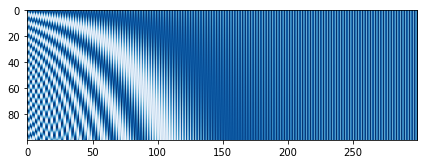

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.imshow(positional_encoding(100,300), cmap='Blues')
plt.show()

- 개념을 이해할 때는 직접 값을 대입해보며 하드코딩을 해보는 것이 도움이 됩니다. 
- 위 예제에는 직접 Positional Encoding의 1번째 열과 2번째 열을 4번째 행까지 구해보는 하드 코딩이 포함되어 있습니다. 
- 위 시각화를 통해 position 값이 각 Time-step 별로 고유하다는 것을 확인할 수 있습니다. 
- 세로축이 Time-step에 해당하고 가로축이 Word Embedding에 더해질 Position 값입니다. 
- 한눈에 봐도 각 스텝마다 고유한 값을 가지는 것을 알 수 있습니다. 
- 저자들은 이뿐만 아니라 Positional Embedding 기법도 제안했습니다. 
- 수식적으로 계산한 Position 값이 아니라, Position에 대한 정보를 담은 Embedding 레이어를 선언하여 위치에 대한 정보를 학습할 수 있게 한 것입니다. 
- 위의 구조에서 Positional Embedding이 훈련 중 값이 변한다고 하더라도 이는 모든 문장에 대해 동일하게 적용되기 때문에 문제가 되지 않습니다.
- 오히려 Sinusoid Embedding 보다 적합한 값이 학습될 것을 기대할 수 있습니다. 
- 하지만 실제로는 두 방법 모두 거의 동일한(±0.1 BLEU) 결과를 보였으며, 저자들은 길이가 길어져도 부담이 없는 Sinusoid Embedding을 채택하였습니다.
- Positional Embedding은 추후에 BERT라는 모델에 적용됩니다.

## Multi-Head Attention
- Multi-Head Attention은 Positional Embedding이 된 문장으로부터 Attention을 추출하는 부분입니다. 
- 위 그림에서 보라색으로 표시된 Masked Multi-Head Attention은 Multi-Head Attention 과 동일하지만 인과 관계 마스킹(Causality Masking)이라는 과정이 하나 더 추가됩니다. 
- Multi-Head Attention 모듈은 Linear 레이어와 Scaled Dot-Product Attention레이어로 이뤄집니다. 

## Scaled Dot-Product Attention
- seq2seq 인코더-디코더 구조에서 attention이란 디코더의 포지션 i 에서 바라본 인코더의 context vector c_i를 해석하기 위해, 인코더의 각 포지션 j 에 부여한 가중치입니다. 
- 이 가중치는 디코더의 state s_i와 인코더의 state h_j 사이의 유사도를 통해 계산됩니다. 
- 같은 원리에서 디코더의 state를 Q(query)라 부르고, 인코더의 state를 K(key)라고 추상화한 것입니다. 
- 그래서 Q와 K의 유사도를 dot product로 계산하여 $softmax({QK^T \over \sqrt d_k})$를 attention 가중치로 삼고, 이것으로 V(value)를 재해석해준 것입니다. 
- 차이점은 인코더 Whrdptj h_j 하나만 존재하던 것이 K와 V 두가지로 분화되었다는 점입니다. 
- Query와 Key를 Dot-Product한 후 Softmax를 취하는 것은 하나의 Query와 모든 Key들 사이의 연관성(유사도)을 계산한 후 그 값을 확률 값으로 만드는 것으로, Query가 어떤 Key와 높은 확률로 연관이 있는지 계산합니다. 
- [transformer 설명](https://reniew.github.io/43/)

- ${1 \over \sqrt d_k}$ : "Scaled" Dot-Product Attention
- Embedding 차원 수가 깊어지면 깊어질수록, Dot-Product의 값은 커지게 되어 Softmax를 거치고 나면 미분 값이 작아지는 현상이 나타납니다. 이를 대비해 Scale 작업이 필요합니다.

- 정리 : Scaled Dot-Product Attention은 Additive(합 연산 기반) Attention과 Dot-Product(=Multiplicative, 곱 연산 기반) Attention 중 후자를 사용한 Attention이고, 차원수가 깊어짐에 따라 Softmax 값이 작아지는 것을 방지하기 위해 Scale 과정을 포함합니다. 

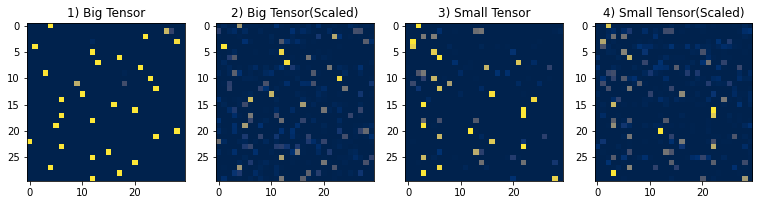

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

def make_dot_product_tensor(shape):
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

    return tf.tensordot(A, B, axes=1)

length = 30
big_dim = 1024.
small_dim = 10.

big_tensor = make_dot_product_tensor((length, int(big_dim)))
scaled_big_tensor = big_tensor / tf.sqrt(big_dim)
small_tensor = make_dot_product_tensor((length, int(small_dim)))
scaled_small_tensor = small_tensor / tf.sqrt(small_dim)

fig = plt.figure(figsize=(13, 6))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.set_title('1) Big Tensor')
ax2.set_title('2) Big Tensor(Scaled)')
ax3.set_title('3) Small Tensor')
ax4.set_title('4) Small Tensor(Scaled)')

ax1.imshow(tf.nn.softmax(big_tensor, axis=-1).numpy(), cmap='cividis')
ax2.imshow(tf.nn.softmax(scaled_big_tensor, axis=-1).numpy(), cmap='cividis')
ax3.imshow(tf.nn.softmax(small_tensor, axis=-1).numpy(), cmap='cividis')
ax4.imshow(tf.nn.softmax(scaled_small_tensor, axis=-1).numpy(), cmap='cividis')

plt.show()

- 모두 같은 범위인 [-3, 3]에서 랜덤 Tensor를 만들어 실제 Attention을 하듯 Dot-product를 하고, Softmax를 취했습니다. 
- 위 히트맵에서 어두운 부분으로는 미분 값(Gradient)이 흐르기 어렵기 때문에 모델이 넓은 특성을 반영할 수 없게 됩니다. 즉, 히트맵이 선명할수록 모델의 시야가 편협해지는 것입니다. 
- Embedding의 깊이가 깊어질수록 모델의 시야가 편협해지는 문제를 Scale을 통해 해결할 수 있습니다. 

## 인과 관계 마스킹(Causality Masking)
- seq2seq 모델 훈련 시 Decoder의 첫 입력으로 \<start\> 토큰이 들어갑니다. 
- Decoder는 컨텍스트 벡터로 압축된 입력문장과 \<start\> 토큰만을 단서로 첫번째 단어를 생성해야 합니다. 
- 그 다음 스텝에서도 같은 단서에 추가로 방금 Decoder 자신이 생성한 첫 번째 단어를 포함하여 두 번쨰 단어를 생성합니다. 이러한 특성을 자기 회귀(Autoregressive)라 칭합니다. 즉 자기 자신을 입력으로 하여 자기 자신을 예측하는 것입니다. 
- 하지만 트랜스포머는 모든 단어를 병렬적으로 처리하기에 자기 회귀적인 특성을 읽어버립니다. 이는 곧 문장을 생성할 수 없다는 의미입니다. 
- 이에 자기 회귀적인 특성을 살리기 위해 추가한 것이 **인과관계마스킹**입니다. 
- 인과관계 마스킹은 목표하는 문장의 일부를 가려, 인위적으로 연속성을 학습하게 하는 방법입니다. 
- 위와 같은 과정을 거치면 모든 Time-Step에 대한 입력을 한번에 처리하면서 자기회귀적인 특성도 유지하게 됩니다. 
- 테스트 시 소스 문장을 Encoder에 전달하고, 타겟 문장은 \<start\>만 넣더라도 모델이 \<start\>토큰만 보고 문장을 생성한적이 있기 때문에, 첫번째 단어를 생성해낼 수 있고, 생성된 단어는 다시 입력으로 전달되어 자기 회귀적으로 문장을 생성하게 됩니다. 
- 이때문에 인과 관계 마스크는 대각항을 포함하지 않는 삼각행렬을 모양새를 갖습니다.
- 입력 문장만을 보고 첫 번째 단어를 생성하는 것은 타겟 문장을 모두 가리는 것이 타당하므로 대각항을 포함하는 것이 맞지만, 그럴 경우 Attention 값을 구하는 과정에서 마지막 또는 첫번째 행이 0개 요소에 대해 softmax를 취하게 되므로 오류를 야기합니다. 따라서 \<start\> 토큰을 활용해 마스크가 대각항을 포함하지 않는 형태가 되게끔 만든 것입니다. 
- 대각항(diagonal entry)란 행렬에서 행과 열의 지표수가 같은 성분(대각성분)을 말합니다. 

#### 코드 살펴보기
- np.cumsum에서 axis=0은 같은 column 끼리의 누적합을 의미합니다. 


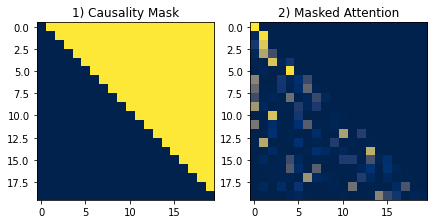

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def make_dot_product_tensor(shape):
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

    return tf.tensordot(A, B, axes=1)

def generate_causality_mask(seq_len):
    mask = 1 - np.cumsum(np.eye(seq_len, seq_len), 0)
    return mask

sample_tensor = make_dot_product_tensor((20, 512))
sample_tensor = sample_tensor / tf.sqrt(512.)

mask = generate_causality_mask(sample_tensor.shape[0])

fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title('1) Causality Mask')
ax2.set_title('2) Masked Attention')

ax1.imshow((tf.ones(sample_tensor.shape) + mask).numpy(), cmap='cividis')

mask *= -1e9
ax2.imshow(tf.nn.softmax(sample_tensor + mask, axis=-1).numpy(), cmap='cividis')

plt.show()

- 좌측은 실제 마스크의 형태, 우측은 마스킹이 적용된 attention입니다. 
- 마스킹은 마스킹할 영역을 -∞로 채우고 그 외 영역을 0으로 채운 배열을 Dot-Product된 값이 더해주는 방식으로 진행됩니다. softmax는 큰 값이 높은 확률을 할당하는 함수이므로, -∞로 가득 찬 마스킹 영역에는 무조건 0의 확률을 할당하게 됩니다. 


## Multi-Head Attention
- 예를 들어 사과대추라는 단어가 512차원의 Embedding을 가진다고 가정할때, 그 중 64차원은 초록빛붉은색에 대한 정보를 표현하고, 다른 64차원은 달콤한 맛에 대한 정보를 표현합니다. 같은 맥락으로 사과대추의 형태, 가격, 유통기한까지 모두 표현될 수 있스빈다. 
- 저자들은 이 모든 정보들을 섞어서 처리하지 말고, 여러 개의 Head로 나눠 처리하면 Embedding의 다양한 정보를 습득할 수 있지 않을까? 하는 아이디어를 제시합니다. 
- Multi-Head Attention에서는 Head는 주로 8개를 사용합니다. Embedding된 10개 단어의 문장이 [10,512]의 형태를 가진다면, Multi-Head Attention은 이를 [10,8,64]로 분할하여 연산합니다. 각 64차원의 Embedding을 독립적으로 Attention한 후, 이를 이어붙여 다시금 [10,512]의 형태로 되돌리며 연산은 끝이 납니다. 
- 이때 Head로 쪼갠 Embedding들끼리 유사한 특성을 가진다는 보장이 없으므로 앞단에 Linear 레이어를 추가해줍니다. Linear 레이어는 데이터를 특정 분포로 매핑 시키는 역할을 해주기 때문에, 설령 단어들의 분포가 제각각이더라도 Linear 레이어는 Multi-Head Attention이 잘 동작할 수 있는 적합한 공간으로 Embedding을 매핑ㄹ합니다. 
- 비슷한 이유로 Head가 Attention한 값이 균일한 분포를 가질 것이라는 보장이 없기 떄문에, Attention값을 합쳐준 후, 최종적으로 Linear레이어를 거치게 됩니다. 

## Position-wise Feed-Forward Networks
- W : Linear layer
- max(0,x) function : 활성함수 ReLU
- 예를 들면 10단어로 이뤄진 Attention된 문장 [10,512]를 [10,2048]공간으로 매핑, 활성함수를 적용한 후 다시 [10,512]공간으로 되돌리는 것입니다. 
- FFN 앞에 Position-Wise라는 수식이 붙는 이유는 FFN 연산이 개별 단어(Position) 마다 적용되기 때문입니다. 
- 트랜스포머는 여러 개의 Encoder와 Decoder를 쌓아 완성하는데, 이때 각 레이어의 Position-wise Feed-Forward Networks는 다른 Parameter를 사용합니다.
- 한 단어를 Embedding차원만큼의 채널을 갖는 이미지로 취급하면, convolution레이어의 weight는 [입력차원수 x 출력차원수 x 커널의크기] 이므로, 커널의 크기가 1이라면 Linear layer와 동일한 크기의 weight를 갖게 됩니다. 
- 최근 구글에서 AI를 만드는 AI, AutoML을 활용해 찾아낸 최적의 트랜스포머구조(Evolved Transformer)는 두 층의 레이어 중 아래층 레이어에서 Convolution layer를 사용합니다. 
- [transformer 논문 리뷰](https://pozalabs.github.io/transformer/)
- [Applying AutoML to Transformer Architectures](https://ai.googleblog.com/2019/06/applying-automl-to-transformer.html)

## Additional Techniques

### Layer Normalization
- Layer Normalization은 데이터를 Feature 차원에서 정규화하는 방법입니다.
- 예를 들어 10단어의 Embedding된 문장의 [10,512] 에서 512차원 Feature를 정규화하여 분포를 일정하게 맞춰주는 것입니다.
- 정규화(Normalization)은 데이터 Feature의 Scale을 직접적으로 조정하는 방법입니다. 
- Batch Normalization은 정규화를 Batch 차원에서 진행하는 것이고 Layer Normalization은 정규화를 Feature차원에서 진행하는 것입니다. 
- [다양한 Normalization](https://subinium.github.io/introduction-to-normalization/)

### Residual Connection
- Skip Connection이라고도 부르는 Residual Connection은 2015년 ResNet이라는 모델과 함께 처음 제안되었습니다. 
- 네트워크가 깊어질수록 Optimize(Train)하는 것이 어렵기 때문에, 56개의 깊은 네트워크는 20개의 레이어를 갖는 얕은 네트워크보다 성능이 좋았습니다. 
- Residual Block은 y = f(x) + x 와 같이 간단한 수식으로 표현이 가능합니다. 
- [ResNet](https://itrepo.tistory.com/36)
- [Detailed Guide to Understand and Implement ResNets](https://cv-tricks.com/keras/understand-implement-resnets/)

### Learning Rate Schedular
- 트랜스포머를 훈련하는 데에는 Adam Optimizer를 사용했는데, 특이한 점은 Learning Rate를 수식에 따라 변화시키며 사용했다는 것입니다.
- warmup_step 까지는 lrate가 선형적으로 증가하고, 이후에는 step_num에 비례해 점차 감소하는 모양새를 보이게 됩니다. 
- 이와 같은 Learning Rate을 사용하면 초반 학습이 잘되지 않은 상태에서의 학습 효율이 늘어나고, 어느 정도 학습이 된 후반에는 디테일한 튜닝을 통해 Global Minimum을 찾아가는 효과가 나타나게 됩니다. 학습의 초반과 후반은 warmup_steps값에 따라 결정됩니다. 

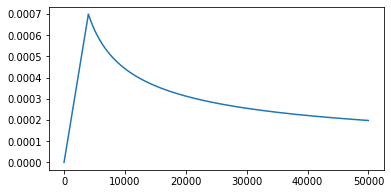

In [8]:
import matplotlib.pyplot as plt
import numpy as np

d_model = 512
warmup_steps = 4000

lrates = []
for step_num in range(1, 50000):
    lrate = (np.power(d_model, -0.5)) * np.min(
        [np.power(step_num, -0.5), step_num * np.power(warmup_steps, -1.5)])
    lrates.append(lrate)

plt.figure(figsize=(6, 3))
plt.plot(lrates)
plt.show()

### Weight Sharing
- Weight Sharing은 모델의 일부 레이어가 동일한 사이즈의 Weight를 가질 때 종종 등장하는 테크닉입니다. 
- 하나의 Weight를 두 개 이상의 레이어가 동시에 사용하도록 하는 것인데, 대표적으로 언어 모델의 Embedding 레이어와 최종 Linear 레이어가 동일한 사이즈의 Weight를 가집니다. 프로그래밍 개념 중 Call By Reference와 비슷한 듯 합니다.
- 앞서 ResNet이 증명한 것처럼 많은 Weight가 곧 성능으로 이어지지 않고, 외려 Optimization에서 불리한 경향을 보였습니다. 
- 실제로 Weight Sharing은 튜닝해야 할 파라미터 수가 감소하기 때문에 학습에 더 유리하며 자체적으로 Regularization 되는 효과도 있습니다. 유연성이 제한되어 과적합을 피하기 용이해지는 것입니다. 
- 트랜스포머에서는 Decoder의 Embedding레이어와 출력층 Linear레이어의 Weight을 공유하는 방식을 사용했습니다. 
- 소스 Embedding과 타겟 Embedding도 논문상에서는 공유했지만 이는 언어의 유사성에 따라서 선택적으로 사용합니다. 
- 만일 소스와 타겟 Embedding 층까지 공유한다면 3개의 레이어가 동일한 Weight를 사용하는 것입니다.
- 또한 출력층 Linear 레이어와 Embedding 레이어의 Feature 분포가 다르므로 Embedding 된 값에 d_{model}의 제곱근 값을 곱해줍니다. 이는 분포를 맞춰줌과 동시에 Positional Encoding이 Embedding 값에 큰 영향을 미치는 것을 방지해줍니다. 

## 트랜스포머 그 후,
- 트랜스포러를 기반으로 발전한 큰 줄기에는 BERT와 GPT가 있습니다. 
    - 1. GPT는 단방향 Attention을 사용하지만 BERT는 양방향 Attention을 사용합니다.
    - 2. GPT는 트랜스포머에서 디코더(decoder)만 사용하고 BERT는 인코더(encoder)만 사용합니다. 
    - 3. GPT는 문장을 생성할 수 있지만 BERT는 문장의 의미를 추출하는 데 강점을 가지고 있습니다. 
- 트랜스포머는 max_sequence_length를 512에서 1024 정도로만 사용하기 때문에 초기에는 주로 몇 개 문장 단위의 번역 작업에 활용되었습니다. 
- 문단의 문맥을 파악하는 수준까지의 보다 긴 입력길이를 처리할 수 있도록, 기존의 트랜스포머에 Recurrence 개념을 추가한 [Transformer-XL](https://comeng.tistory.com/entry/Transformer-XL-%EC%9E%90%EB%A3%8C%EC%A0%95%EB%A6%AC-%EB%B0%8F-%EC%84%A4%EB%AA%85%EC%9A%94%EC%95%BD) 이 제안되기도 했습니다. 
- 현재는 모델 성능이 극대화되어 성능을 높이고자 하는 연구보다는 연산량을 줄이고자 하는 연구가 늘고 있습니다. [Reformer](https://brunch.co.kr/@synabreu/31)는 트랜스포머를 연산량 측면에서 혁신적으로 개선한 모델입니다. 
- [ratgo's BERT와 GPT](https://ratsgo.github.io/nlpbook/docs/language_model/bert_gpt/#gpt)
- [월간 자연어 처리 - MHA](https://www.facebook.com/permalink.php?story_fbid=156092245822648&id=111809756917564)[(논문리뷰) Are Sixteen Heads Really Better than One?](https://littlefoxdiary.tistory.com/m/66?category=847374)